# Using the NDBC Buoy Data Scraper
[Realtime Buoy Data](#Realtime-Buoy-Data)  
[Historical Buoy Data](#Historical-Buoy-Data)

## Realtime Buoy Data
I will use the NDBC buoy at Neah Bay (https://www.ndbc.noaa.gov/station_page.php?station=46087)  
**A map of all stations** can be found at https://www.ndbc.noaa.gov/ 

In [1]:
from buoyscraper import RealtimeScraper

### Creat RealtimeScraper Object with buoy id  
**Printing a scraper object provides some info** about the buoy, obtained in ```BuoyDataScraper._set_buoy_info()```

In [2]:
neah_bay_id = "46087"
neah_buoy = RealtimeScraper(neah_bay_id)
print(neah_buoy)

Station ID: 46087
Station Name: Neah Bay - 6 NM North of Cape Flattery, WA     (Traffic Separation Lighted Buoy)
Location: 48.493 N, 24.726 W
Time Zone: P
Owner: NDBC, US
Ttype: 3-meter discus buoy
Notes: nan


### Getting Buoy Data

**1. Get buoy data in pandas dataframe**

In [3]:
# See what data types are available for this buoy
print(neah_buoy.get_available_dtypes())

['stdmet', 'adcp', 'cwind', 'spec', 'data_spec', 'swdir', 'swdir2', 'swr1', 'swr2']


In [4]:
# Standard Meteorological Data
neah_stdmet = neah_buoy.scrape_dtype('stdmet')
neah_stdmet.head(3)

columns,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
datetime,,,,,,,,,,,,,,
2019-10-24 00:20:00+00:00,90.0,6.0,7.0,1.3,10,6.9,272,1031.5,10.6,11.5,8.9,NaN,NaN,NaN
2019-10-23 23:50:00+00:00,90.0,6.0,7.0,1.4,11,7.2,259,1031.5,10.7,11.4,9.0,NaN,-1.1,NaN
2019-10-23 23:20:00+00:00,80.0,5.0,6.0,1.4,10,7.4,277,1032.0,10.7,11.3,8.3,NaN,NaN,NaN


In [5]:
# We can see there is only 45 days of realtime data available
max(neah_stdmet.index) - min(neah_stdmet.index)

Timedelta('45 days 00:00:00')

In [6]:
# Check the units for this data type
help(RealtimeScraper.stdmet)

Help on function stdmet in module buoyscraper.realtime_scraper:

stdmet(self, url)
    Standard Meteorological Data
    dtype:   "stdmet"
    index:   datetime64[ns, UTC]
    columns: WDIR  WSPD  GST  WVHT  DPD  APD  MWD  PRES  ATMP  WTMP  DEWP  VIS  PTDY  TIDE
    units:   degT  m/s   m/s   m    sec  sec  degT  hPa  degC  degC  degC  nmi  hPa    ft



**2. Save one data type at default file path pickle and load it**   
Note: If a pickle for the specified ```dtype``` and ```buoy_id``` already exists at the default (or specified) path, *it will be updated with any new data!*

In [7]:
neah_buoy.scrape_dtype("stdmet", save=True)

Added 1 new items to data/46087/realtime/stdmet.pkl


In [8]:
# Load data with file path as default
import buoyscraper as bs

neah_stdmet = bs.load_realtime(neah_bay_id, "stdmet")

**3. Saving all data types at default file path**  
We can then load any of them as pandas dataframes

In [9]:
neah_buoy.scrape_all_dtypes()

Added 0 new items to data/46087/realtime/stdmet.pkl
Added 1 new items to data/46087/realtime/adcp.pkl
Added 3 new items to data/46087/realtime/cwind.pkl
Added 0 new items to data/46087/realtime/spec.pkl
Added 0 new items to data/46087/realtime/data_spec.pkl
Added 0 new items to data/46087/realtime/swdir.pkl
Added 0 new items to data/46087/realtime/swdir2.pkl
Added 0 new items to data/46087/realtime/swr1.pkl
Added 0 new items to data/46087/realtime/swr2.pkl


In [10]:
neah_stdmet = bs.load_realtime(neah_bay_id, "stdmet")
neah_spec = bs.load_realtime(neah_bay_id, "spec")
neah_swr1 = bs.load_realtime(neah_bay_id, "swr1")

### Some simple plotting

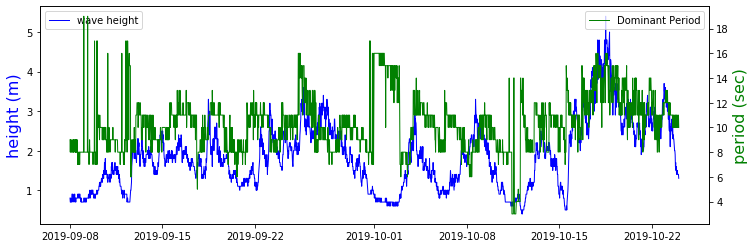

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters # To get rid of warning
register_matplotlib_converters()

fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

ax1.plot(neah_stdmet['WVHT'], 'b-', linewidth=1, label='wave height')
ax1.set_ylabel('height (m)', color='b', size=16)
ax1.legend(loc="upper left")
ax2.plot(neah_stdmet['DPD'], 'g-', linewidth=1, label='Dominant Period')
ax2.set_ylabel('period (sec)', color='g', size=16)
ax2.legend()
plt.show()

## Historical Buoy Data
Accessing historical data mostly works the same as realtime data.  The main difference is the data that are available.

In [12]:
from buoyscraper import HistoricalScraper

### Creat RealtimeScraper Object with buoy id  

In [13]:
neah_bay_id = "46087"
neah_buoy_hist = HistoricalScraper(neah_bay_id)
#print(neah_buoy)

### Getting Buoy Data
* ```scrape_dtype(dtype)``` gets all available historical data, including months this year.
* ```scrape_year(dtype, year)``` gets data from that year
* ```scrape_month(dtype, month)``` gets data from a month this year

In [14]:
neah_stdmet = neah_buoy_hist.scrape_dtype("stdmet")

In [15]:
neah_stdmet

columns,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2007-01-01 00:00:00+00:00,110.0,9.2,11.0,2.19,12.12,8.36,249.0,1024.2,6.9,8.3,3.9,NaN,NaN
2007-01-01 00:30:00+00:00,109.0,8.0,9.8,NaN,NaN,NaN,NaN,1024.5,7.0,8.3,4.3,NaN,NaN
2007-01-01 01:00:00+00:00,110.0,8.5,10.5,2.00,12.12,7.88,238.0,1024.4,7.1,8.3,4.2,NaN,NaN
2007-01-01 01:30:00+00:00,114.0,8.6,10.4,NaN,NaN,NaN,NaN,1024.6,7.2,8.3,4.2,NaN,NaN
2007-01-01 02:00:00+00:00,112.0,8.7,10.6,2.32,12.12,8.12,233.0,1024.5,7.2,8.3,4.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:20:00+00:00,106.0,5.1,6.4,1.64,12.90,8.46,272.0,1031.7,6.7,8.7,-1.4,NaN,NaN
2018-12-31 21:50:00+00:00,105.0,4.8,6.2,1.62,12.12,8.45,282.0,1031.8,6.8,8.8,-2.1,NaN,NaN
2018-12-31 22:20:00+00:00,107.0,4.8,6.0,1.68,12.12,8.54,271.0,1032.3,6.7,8.8,-1.8,NaN,NaN


In [16]:
# Check the units for this data type
help(HistoricalScraper.stdmet)

Help on function stdmet in module buoyscraper.historical_scraper:

stdmet(self, url)
    Standard Meteorological Data
    dtype:   "stdmet"
    index:   datetime64[ns, UTC]
    columns: WDIR  WSPD  GST  WVHT  DPD  APD  MWD  PRES  ATMP  WTMP  DEWP  VIS  PTDY  TIDE
    units:   degT  m/s   m/s   m    sec  sec  degT  hPa  degC  degC  degC  nmi  hPa    ft



**2. Save one data type at default file path pickle and load it**   
Note: If a pickle for the specified ```dtype``` and ```buoy_id``` already exists at the default (or specified) path, *it will be updated with any new data!*

In [17]:
neah_buoy_hist.scrape_dtype("stdmet", save=True)

Saved data to data/46087/historical/stdmet.pkl


In [18]:
# Load data with file path as default
import buoyscraper as bs

neah_stdmet = bs.load_historical(neah_bay_id, "stdmet")

**3. Saving all data types at default file path**  
We can then load any of them as pandas dataframes

In [19]:
neah_buoy_hist.scrape_all_dtypes()

Saved data to data/46087/historical/stdmet.pkl
Saved data to data/46087/historical/swden.pkl
Saved data to data/46087/historical/swdir.pkl
Saved data to data/46087/historical/swdir2.pkl
Saved data to data/46087/historical/swr2.pkl
Saved data to data/46087/historical/adcp.pkl
Saved data to data/46087/historical/cwind.pkl


In [21]:
# Saving all data types from another buoy
new_dunge_id = "46088"
dunge_buoy_hist = HistoricalScraper(new_dunge_id)
dunge_buoy_hist.scrape_all_dtypes()

Saved data to data/46088/historical/stdmet.pkl
Saved data to data/46088/historical/swden.pkl
Saved data to data/46088/historical/swdir.pkl
Saved data to data/46088/historical/swdir2.pkl
Saved data to data/46088/historical/swr2.pkl
Saved data to data/46088/historical/adcp.pkl
Saved data to data/46088/historical/cwind.pkl


In [22]:
# Loading saved data from both buoys
neah_swden = bs.load_historical(neah_bay_id, "swden")
dunge_swden = bs.load_historical(new_dunge_id, "swden")

A plot showing the difference between spectral density means at the New Dungeness Station and the Neah Bay Station:

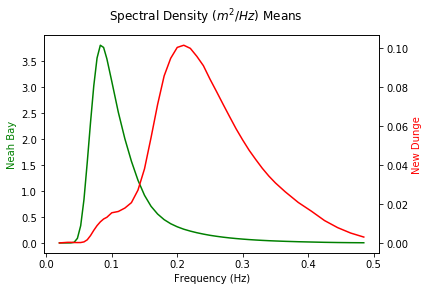

In [27]:
frequencies = [float(hz) for hz in list(dunge_swden)]
neah_spectral_means = neah_swden.sum(axis=0)/len(neah_swden)
dunge_spectral_means = dunge_swden.sum(axis=0)/len(dunge_swden)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(frequencies, neah_spectral_means, 'g-')
ax2.plot(frequencies, dunge_spectral_means, 'r-')
ax1.set_ylabel('Neah Bay', color='g')
ax2.set_ylabel('New Dunge', color='r')
fig.suptitle("Spectral Density $(m^2/Hz)$ Means")
ax1.set_xlabel('Frequency (Hz)')
plt.show()